## PROBLEM STATEMENT: Design a project from the MNIST dataset to identify digit classification using the ANN algorithm

#Loading the dataset

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
df= pd.read_csv('digit_svm.csv')

In [ ]:
df.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
df.shape

(42000, 785)

In [ ]:
df.size

32970000

In [ ]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
df.corr()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033424,0.025050,0.019558,0.014490,0.009790,0.006075,NaN,NaN,NaN,NaN
pixel0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,0.006075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000240,-0.000174,-0.000124,0.236633,0.905835,1.000000,NaN,NaN,NaN,NaN
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
label = df.label

In [ ]:
temp_df = df.drop(['label'], axis=1)

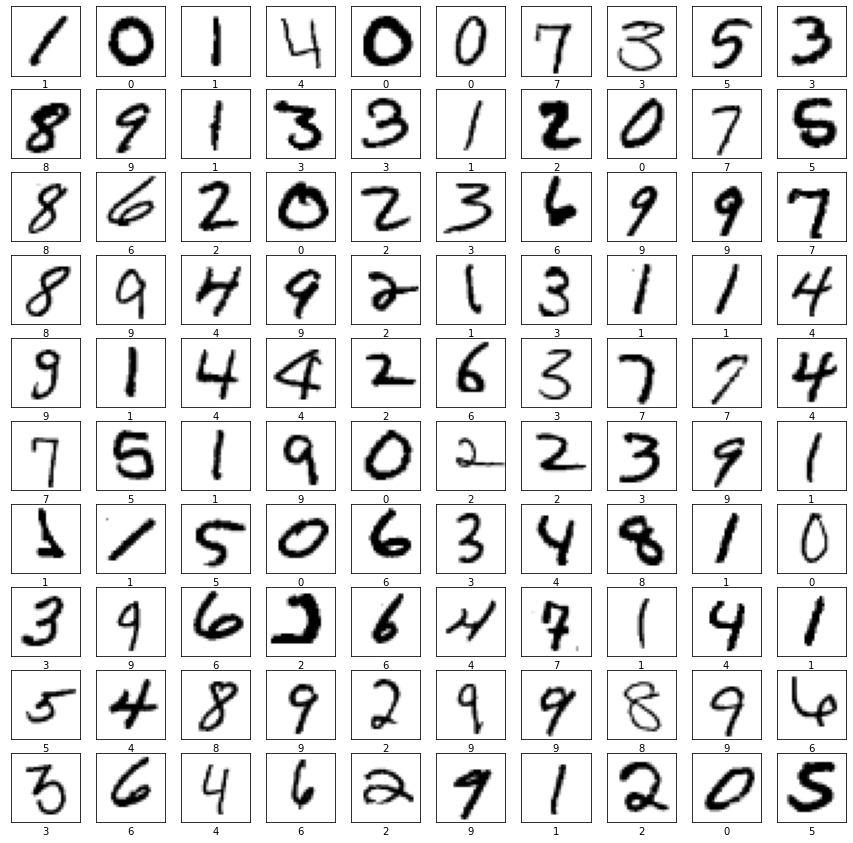

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(temp_df.iloc[i].values.reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(label.values[i]))
plt.show()

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

#Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

#Scaling Data

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Building ANN Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units = 784, activation = 'relu', input_dim = 784))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.05))

In [ ]:
model.add(Dense(units = 10, activation = 'softmax'))


#Compiling ANN Model

In [ ]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 28, epochs = 25)

Train on 37800 samples, validate on 4200 samples
Epoch 1/25
37800/37800 [==============================] - 11s 302us/step - loss: 1.1071 - accuracy: 0.6408 - val_loss: 0.3697 - val_accuracy: 0.9074
Epoch 2/25
37800/37800 [==============================] - 11s 295us/step - loss: 0.3203 - accuracy: 0.9119 - val_loss: 0.2665 - val_accuracy: 0.9388
Epoch 3/25
37800/37800 [==============================] - 11s 301us/step - loss: 0.2085 - accuracy: 0.9427 - val_loss: 0.2518 - val_accuracy: 0.9488
Epoch 4/25
37800/37800 [==============================] - 12s 318us/step - loss: 0.1551 - accuracy: 0.9573 - val_loss: 0.2154 - val_accuracy: 0.9543
Epoch 5/25
37800/37800 [==============================] - 11s 303us/step - loss: 0.1228 - accuracy: 0.9658 - val_loss: 0.1939 - val_accuracy: 0.9562
Epoch 6/25
37800/37800 [==============================] - 14s 359us/step - loss: 0.0975 - accuracy: 0.9733 - val_loss: 0.2264 - val_accuracy: 0.9598
Epoch 7/25
37800/37800 [==============================] -

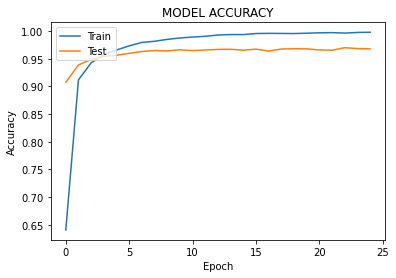

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('MODEL ACCURACY')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

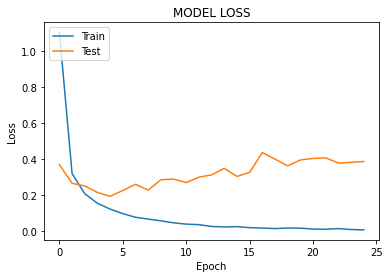

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('MODEL LOSS')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model Accuracy

In [ ]:
model_accuracy = model.evaluate(X_test, y_test)

4200/4200 [==============================] - 0s 78us/step


In [ ]:
accuracy_percentage = model_accuracy[1]*100

In [ ]:
print(" Model Accuracy is : {0:.1f}%".format(accuracy_percentage))

 Model Accuracy is : 96.8%


In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
test_df.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [ ]:
test_df.size

21952000

In [ ]:
test_df.shape

(28000, 784)

In [ ]:
test = test_df.iloc[:,:].values

#Prediction

In [ ]:
test_prediction = model.predict(test)

In [ ]:
results = test_prediction.argmax(axis=1)

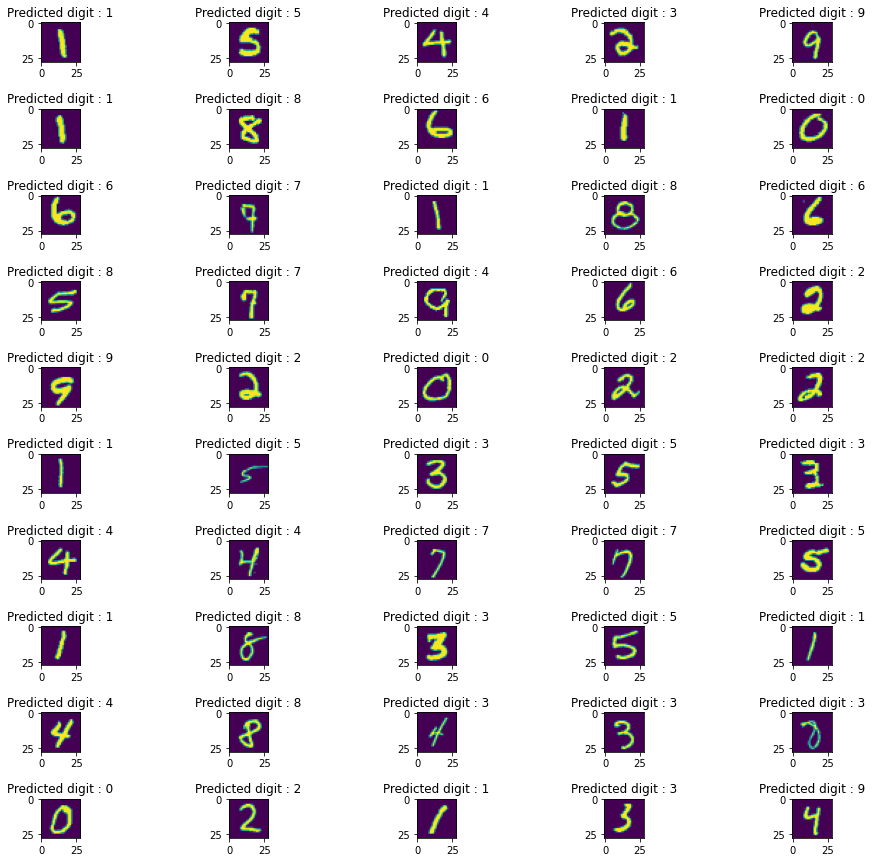

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,51):
    index = np.random.randint(1,28001)
    plt.subplot(10,5,i)
    plt.imshow(test[index].reshape(28,28))
    res = results[index]
    plt.title("Predicted digit : {}".format(res))
plt.subplots_adjust(hspace = 1.2, wspace = 1.2)
plt.show()